In [199]:
import cv2
import numpy as np
import imutils
from google.colab.patches import cv2_imshow # for image display

Reading the images

In [200]:
# im1 = cv2.imread("1.jpg")
# im2 = cv2.imread("2.jpg")
# im3 = cv2.imread("3.jpg")
path1 = input("path of image 1")
path2 = input("path of image 2")
path3 = input("path of image 3")
im1 = cv2.imread(path1)
im2 = cv2.imread(path2)
im3 = cv2.imread(path3)

path of image 11.jpg
path of image 22.jpg
path of image 33.jpg


Creating a function for finding center of the locations of given color

In [201]:
def find_center_circle(lower_bound, upper_bound, image):
  hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
  # finding the colors within the bounds
  mask = cv2.inRange(hsv, lower_bound, upper_bound)
  cnts = cv2.findContours(mask.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
  cnts = imutils.grab_contours(cnts)
  centers = []
  img = image.copy()
  for c in cnts:
    M = cv2.moments(c)
    cX = int(M["m10"] / M["m00"])
    cY = int(M["m01"] / M["m00"])
    centers.append([int(cX), int(cY)])
    cv2.circle(img, (cX, cY), 7, (155, 255, 255), 2)
  cv2_imshow(img)
  return centers

Finding the centers of green circles

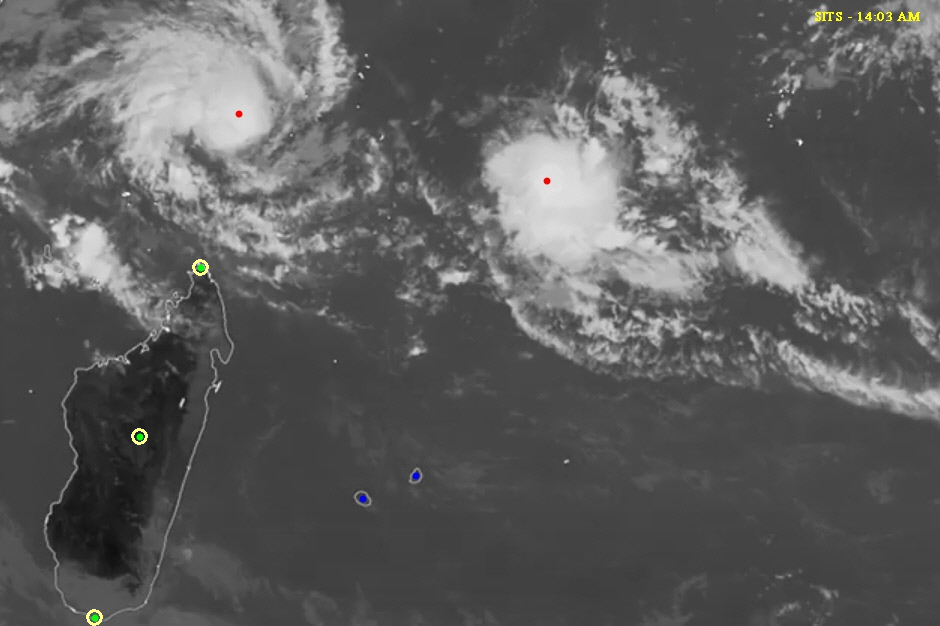

[[94, 617], [139, 436], [200, 267]]


In [202]:
# lower bound and upper bound for Green color
lower_bound = np.array([59, 30, 30])   
upper_bound = np.array([61, 255, 255])

green_center = find_center_circle(lower_bound, upper_bound, im1)
g3 = np.array([green_center[0][0], green_center[0][1]])    # coordinates of Benonoka
g2 = np.array([green_center[1][0], green_center[1][1]])    # coordinates of capital city Antananarivo
g1 = np.array([green_center[2][0], green_center[2][1]])    # coordinates of Antsiranana
print(green_center)

Finding the center of cyclones in image 2 and image 3

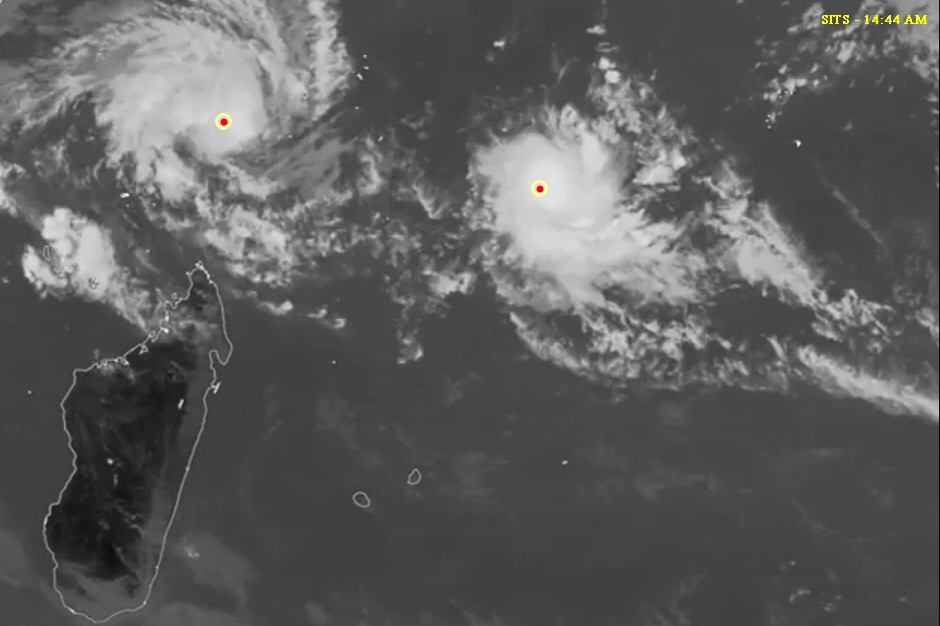

Center of cyclones in image 2 [[539, 188], [223, 121]]


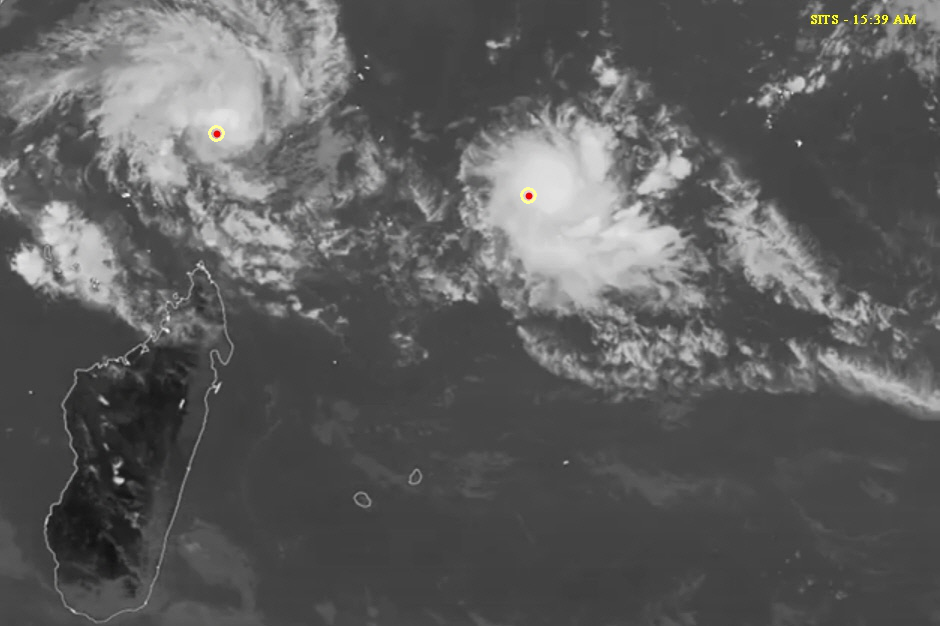

Center of cyclones in image 3 [[528, 195], [216, 133]]


In [203]:
# lower bound and upper bound for Red color
lower_bound = np.array([0, 200, 200])   
upper_bound = np.array([2, 255, 255])

cyclone_im2 = find_center_circle(lower_bound, upper_bound, im2)
cy2_c1 = np.array([cyclone_im2[0][0], cyclone_im2[0][1]])   # coordinates of cyclone 1 in img 2
cy1_c1 = np.array([cyclone_im2[1][0], cyclone_im2[1][1]])   # coordinates of cyclone 2 in img 2
print("Center of cyclones in image 2", cyclone_im2)

cyclone_im3 = find_center_circle(lower_bound, upper_bound, im3)
cy2_c2 = np.array([cyclone_im3[0][0], cyclone_im3[0][1]])   # coordinates of cyclone 1 in img 3
cy1_c2 = np.array([cyclone_im3[1][0], cyclone_im3[1][1]])   # coordinates of cyclone 2 in img 3
print("Center of cyclones in image 3", cyclone_im3)

Finding the centers of blue circles

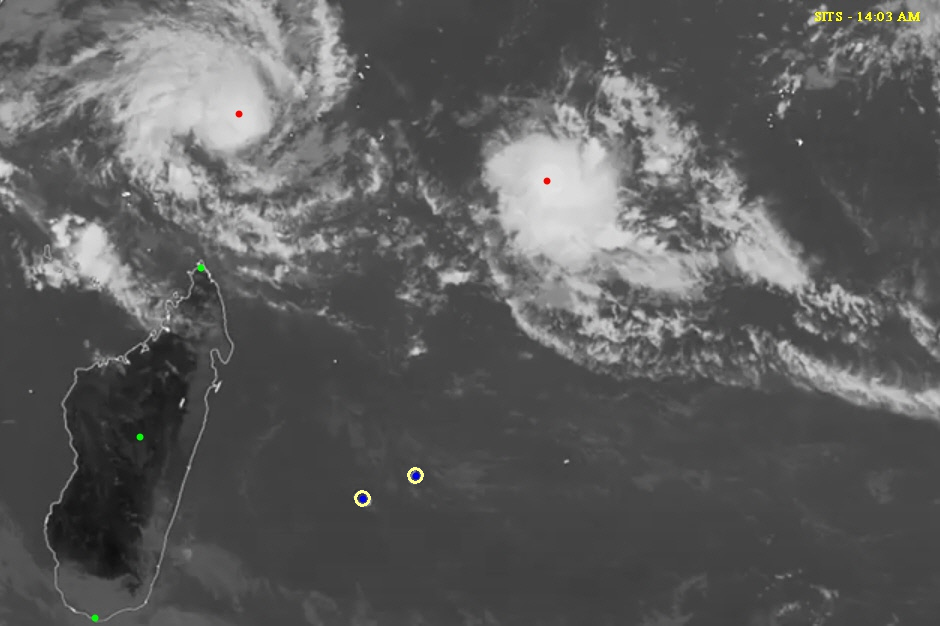

[[362, 498], [415, 475]]


In [204]:
# lower bound and upper bound for Blue color
lower_bound = np.array([119, 100, 100])   
upper_bound = np.array([121, 255, 255])

blue_center = find_center_circle(lower_bound, upper_bound, im1)
b1 = np.array([blue_center[0][0], blue_center[0][1]])    # coordinates of Reunion
b2 = np.array([blue_center[1][0], blue_center[1][1]])    # coordinates of Mauritius
print(blue_center)

Finding the pixel to Kilometers ratio

In [205]:
dg13 = np.linalg.norm(g3-g1)
kmpp1 = 1500/dg13              # This is the pixel to Km ratio between Antsiranana and Benonoka

db12 = np.linalg.norm(b2-b1)
kmpp2 = 250/db12               # This is the pixel to Km ratio between Reunion and Mauritius

kmpp = (kmpp1+kmpp2)/2         # Taking the average of the two ratios
print("Pixel to Km ratio between Antsiranana and Benonoka:", kmpp1)
print("Pixel to Km ratio between Reunion and Mauritius:", kmpp2)
print("Average Pixel to Km ratio:", kmpp)

Pixel to Km ratio between Antsiranana and Benonoka: 4.101730237759558
Pixel to Km ratio between Reunion and Mauritius: 4.327099108943766
Average Pixel to Km ratio: 4.214414673351662


Finding the intersection of the two trajectories of cyclones

In [206]:
from sympy import Point, Line, Segment
  
p1, p2, p3, p4 = Point(cy1_c1[0], cy1_c1[1]), Point(cy1_c2[0], cy1_c2[1]), Point(cy2_c1[0], cy2_c1[1]), Point(cy2_c2[0], cy2_c2[1])
l1 = Line(p1, p2)                                                # Creating a Linear trajectory of cyclone1
l2 = Line(p3, p4)                                                # Creating a Linear trajectory of cyclone1
inter_ = l1.intersection(l2)                                     # Finding the intersection of the two trajectories for finding apojuncture 
int_apo = np.array([float(inter_[0][0]), float(inter_[0][1])])
apojuncture = int_apo*kmpp

print("Co-ordinate of apojuncture wrt image in Km is:", apojuncture)

Co-ordinate of apojuncture wrt image in Km is: [-108.35615558 2306.80810874]


Finding distance of Appojuncture from Capital City

In [207]:
capital = g2                            
dist_cap = np.linalg.norm(capital - int_apo)*kmpp            
print("Distance of Apojuncture from Capital City is",dist_cap, "Km")

Distance of Apojuncture from Capital City is 837.9273188217388 Km


Finding the Velocity of the two Cyclones

In [208]:
deltime = 55
deltime = 55/60.0

del1 = np.linalg.norm(cy1_c2 - cy1_c1)
del2 = np.linalg.norm(cy2_c2 - cy2_c1)

v1 = del1/deltime
v2 = del2/deltime

print("Velocity of Cyclone 1 is:", v1, "Km per hr")
print("Velocity of Cyclone 2 is:", v2, "Km per hr")

Velocity of Cyclone 1 is: 15.15539344303615 Km per hr
Velocity of Cyclone 2 is: 14.223714338623962 Km per hr


Finding when the two cyclones will reach the apojuncture

In [209]:
dcy1 = np.linalg.norm(int_apo - cy1_c2)
dcy2 = np.linalg.norm(int_apo - cy2_c2)

time1 = dcy1/v1   # time after which cyclone 1 will reach apojuncture in hrs
time2 = dcy2/v2   # time after which cyclone 2 will reach apojuncture in hrs

time1_hrs = int(time1)
time1_minutes = int((time1 - int(time1))*60)
time2_hrs = int(time2)
time2_minutes = int((time2 - int(time2))*60)

print("First cyclone will reach apojuncture after", time1_hrs, "hrs", time1_minutes, "Minutes from 15:39 that day (Last sattelite Caputre)")
print("First cyclone will reach apojuncture after", time2_hrs, "hrs", time2_minutes, "Minutes from 15:39 that day (Last sattelite Caputre)")

First cyclone will reach apojuncture after 31 hrs 39 Minutes from 15:39 that day (Last sattelite Caputre)
First cyclone will reach apojuncture after 46 hrs 8 Minutes from 15:39 that day (Last sattelite Caputre)


In [210]:
t1_days = int((15 + time1_hrs + (int((39 + time1_minutes)/60)))/24)
t1_hrs = (15 + time1_hrs + (int((39 + time1_minutes)/60)))%24
t1_minutes = (39 + time1_minutes)%60

t2_days = int((15 + time2_hrs + (int((39 + time2_minutes)/60)))/24)
t2_hrs = (15 + time2_hrs + (int((39 + time2_minutes)/60)))%24
t2_minutes = (39 + time2_minutes)%60

print("Cyclone 1 will reach apojuncture", t1_days, "days after, at time ", t1_hrs, ":", t1_minutes)
print("Cyclone 2 will reach apojuncture", t2_days, "days after, at time ", t2_hrs, ":", t2_minutes)

Cyclone 1 will reach apojuncture 1 days after, at time  23 : 18
Cyclone 2 will reach apojuncture 2 days after, at time  13 : 47


In [211]:
print("Cyclones will not collide as they reach the apojuncture at different times")

Cyclones will not collide as they reach the apojuncture at different times


Visualising the trajectory on the image

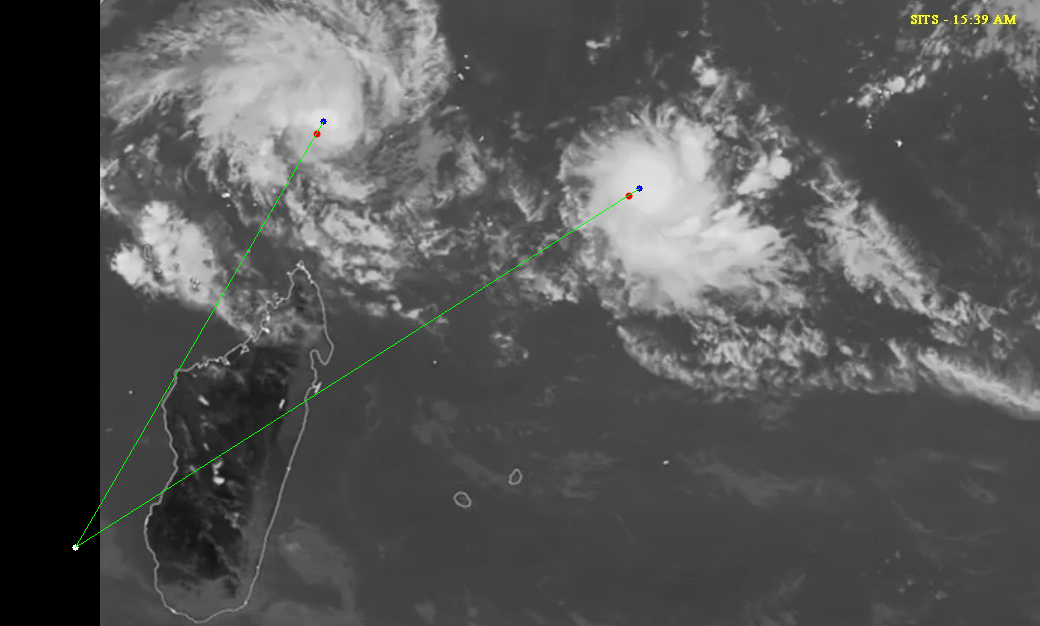

In [212]:
trajectory_img = np.zeros((im3.shape[0],100+im3.shape[1],3), np.uint8)
trajectory_img[:, 100:, :] = im3

# drawing the initial points(blue) from image 2 and apojuncture(white)
cv2.circle(trajectory_img, (100+cy1_c1[0], cy1_c1[1]), 3, (255, 0, 0), -1)   
cv2.circle(trajectory_img, (100+cy2_c1[0], cy2_c1[1]), 3, (255, 0, 0), -1)
cv2.circle(trajectory_img, (100 + int(int_apo[0]), int(int_apo[1])), 3, (255, 255, 255), -1)

# drawing the trajectories
cv2.line(trajectory_img, (100+cy1_c1[0], cy1_c1[1]), (100+int(int_apo[0]), int(int_apo[1])), [0,255,0], 1)
cv2.line(trajectory_img, (100+cy2_c1[0], cy2_c1[1]), (100+int(int_apo[0]), int(int_apo[1])), [0,255,0], 1)

cv2_imshow(trajectory_img)